# Introdução a Ciência de Dados - curso Alura

# ***AULA 1 - DADOS E VISUALIZAÇÕES***



*  Importar pandas que é uma biblioteca de análise de dados;
* Ler dados CSV;
* Fazer upload de arquivo para o Google Colab;
* Renomear colunas;
* Contar dados;
* Melhorar a visualização das informações.



In [1]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Documentação de Pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [ ]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Documentação de Pandas Series
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [ ]:
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


mean -> média aritmética simples: somar todas as notas e dividir pelo número de avaliações

median -> mediana é o valor que está no meio da amostra. Ou seja, ela divide a amostra em duas partes, onde metade está acima e metade abaixo


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

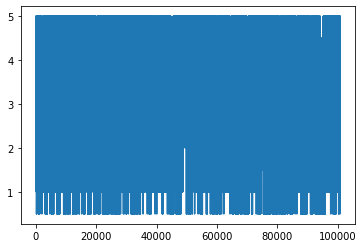

In [ ]:
notas.nota.plot()

Por padrão, o gráfico plot() de uma série cruza os índices da tabela com os valores da coluna que apontamos (no caso, nota), criando pontos para cada resultado. Todos os pontos são, então, ligados por retas, gerando o gráfico ilegível da imagem.

Documentação pandas.DataFrame.plot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

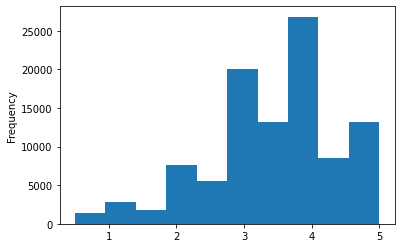

In [ ]:
notas.nota.plot(kind='hist')

Na verdade, queremos saber quantas vezes cada informação aparece nesse conjunto de dados, o que pode ser visualizado em um histograma. Para gerá-lo, usaremos, no método plot(), o argumento kind com o valor hist

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


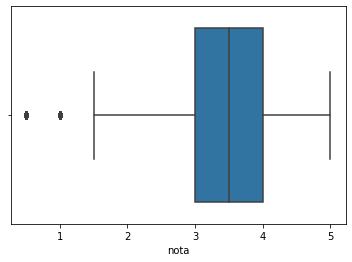

In [ ]:
import seaborn as sns

sns.boxplot(notas.nota)

seaborn: statistical data visualization
https://seaborn.pydata.org/

# ***AULA 2 - ANALISE EXPLORATÓRIA***
**Análise exploratória de dados e mais gráficos**


*   Trabalhar com query;
*   O que são bins;
*   Filtrar apenas uma coluna


Estamos analisando e explorando os dados por meio de medidas descritivas ou visualizações

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Analisando algumas notas específicas por filme

fazendo "perguntas" / consultas nos dados
query


In [ ]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

Agrupando por filmes e tirando a média


In [ ]:
notas.groupby("filmeId")

In [ ]:
notas.groupby("filmeId").mean()["nota"]

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]

In [ ]:
medias_por_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

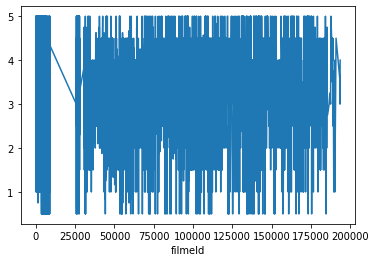

In [ ]:
medias_por_filme.plot()

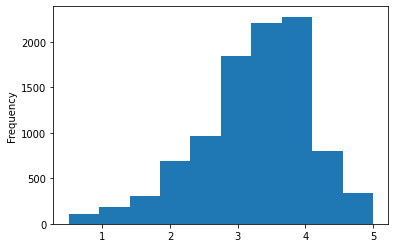

In [ ]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


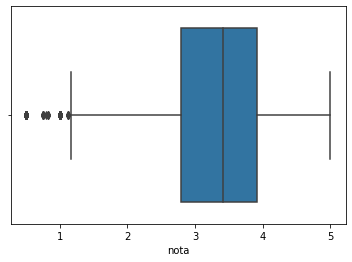

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


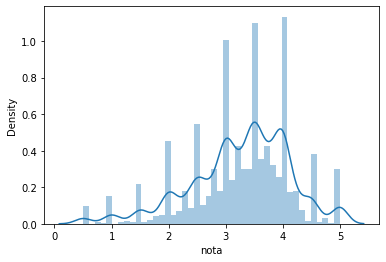

In [ ]:
sns.distplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


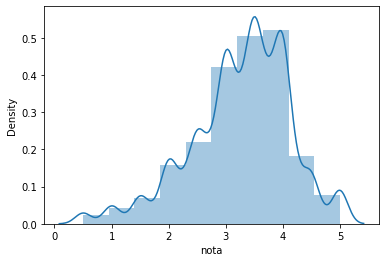

In [ ]:
sns.distplot(medias_por_filme, bins=10)

biblioteca **Matplotlib** de baixo nível 

a documentação do Matplotlib ->
https://matplotlib.org/contents.html


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

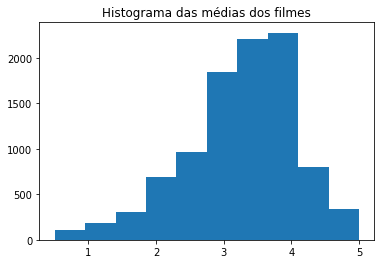

In [ ]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

Fazendo o boxplot no eixo y com o seaborn

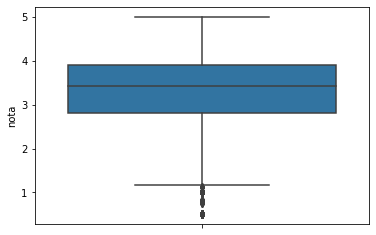

In [ ]:
sns.boxplot(y=medias_por_filme)

usando o plt para alterar o tamanho do gráfico sns


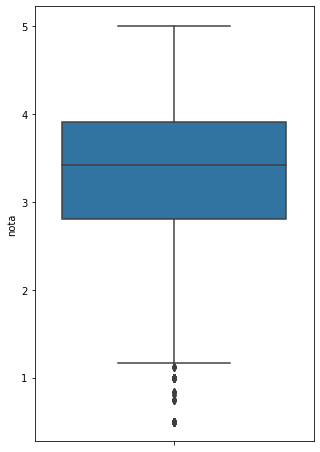

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

# ***AULA 3 - VARIÁVEIS***

* Importar um CSV;
* Identificar o tipo de uma variável observando seu conteúdo;
* O que é categórica ordinal;
* O que é quantitativa.

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


categórica nominal
   não existe uma ordem a não ser a lexicográfica

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

a categórica nominal é diferente da categórica ordinal que tem uma ordem ex:

primeiro grau
segundo grau
terceiro grau

primeiro grau > segundo grau > terceiro grau


---
ja o 
budget => orçamento => quantitativa continuo



---
a 
quantidade de votos => 1, 2, 3, 4 - não tem 2,5 votos e as distâncias são iguais, a mesma distância de 4 e 3 é a de 1 e 2 => é quantitativa 


---
As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.





# ***AULA 4 - DATA VISUALIZATION***

* Comparar categorias;
* O que é uma Series;
* Instalar o seaborn;
* Transformar em dataframe com a função to_frame();
* Remover o índice para gerar duas colunas usando a função reset_index();
* Utilizar o Categorical do seaborn.

In [ ]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ar', 'ta', 'ro', 'id', 'cs', 'ps',
       'el', 'te', 'tr', 'sl', 'nb', 'no', 'ky', 'is', 'vi', 'af', 'pl', 'hu',
       'xx'],
      dtype='object')

In [ ]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

**tmdb["original_language"].value_counts() é uma série pois temos o index (as linguas) e apenas uma coluna de valores (a contagem)**

para criar um data frame de verdade precisa chamar o to_frame(), como abaixo

para transformar em duas columas chama o reset_index()

In [ ]:
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


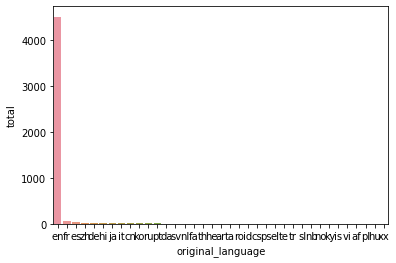

In [ ]:
sns.barplot(x= "original_language", y= "total", data = contagem_de_linguas)

In [ ]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

NameError: name 'sns' is not defined

In [ ]:
plt.pie(contagem_de_linguas["total"], labels = contagem_de_linguas["original_language"])

NameError: name 'plt' is not defined